# Open Traffic Reporter: Speed Error Comparison with Real-World Data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import sys; sys.path.insert(0, os.path.abspath('..'));
import validator.validator as val
import numpy as np
import time as t
import glob
import seaborn as sns
%matplotlib inline

### 1. Download [TrackAddict](https://play.google.com/store/apps/details?id=com.hptuners.trackaddict&hl=en) onto your mobile device 

* for iPhone [here](https://itunes.apple.com/us/app/trackaddict/id632355692?mt=8).

### 2. (optional) Install a WiFi/Bluetooth enabled OBDII Scanner into the dataport of your automobile

* device used for testing can be purchased [here](https://www.amazon.com/Foseal-Scanner-Adapter-Diagnostic-Android/dp/B00W0SDLRY/ref=sr_1_4?s=automotive&ie=UTF8&qid=1501610469&sr=1-4&keywords=obdii).

### 3. Open the app and record your trips as you drive around town 

* make sure you configure the app to record speed in km/h

### 4. In the app, export your trips by selecting the "Share" option, and e-mailing the raw .csv files to yourself

### 5. Store all of your trip .csv's in a new directory on your computer 

In [10]:
pd.read_csv('../data/driven/Log-20170725-102138 home to quikstop.csv', skiprows=2)

,Time,Lap,Predicted Lap Time,Predicted vs Best Lap,GPS_Update,GPS_Delay,Latitude,Longitude,Altitude (m),Altitude (ft),Speed (KM/H),Heading,Accuracy (m),Accel X,Accel Y,Accel Z,Brake (calculated),OBD_Update,Vehicle Speed (km/h) *OBD
0,0.000,0,0.0,0.0,1.0,0.0,37.826172,-122.258894,-7.0,-23.0,16.2,30.2,3.0,0.18,-0.12,-0.08,0.0,1.0,18.0
1,0.003,0,0.0,0.0,0.0,0.0,37.826172,-122.258894,-7.0,-23.0,16.2,30.2,3.0,0.18,-0.12,-0.08,0.0,0.0,18.0
2,0.030,0,0.0,0.0,1.0,0.0,37.826213,-122.258871,-7.0,-23.0,16.1,28.4,4.0,0.22,-0.13,-0.05,1.0,0.0,18.0
3,0.090,0,0.0,0.0,0.0,0.0,37.826213,-122.258871,-7.0,-23.0,16.1,28.4,4.0,0.27,-0.13,-0.04,1.0,0.0,18.0
4,0.148,0,0.0,0.0,0.0,0.0,37.826213,-122.258871,-7.0,-23.0,16.1,28.4,4.0,0.31,-0.13,-0.04,1.0,0.0,18.0
5,0.198,0,0.0,0.0,0.0,0.0,37.826213,-122.258871,-7.0,-23.0,16.1,28.4,4.0,0.34,-0.13,-0.03,1.0,0.0,18.0
6,0.246,0,0.0,0.0,0.0,0.0,37.826213,-122.258871,-7.0,-23.0,16.1,28.4,4.0,0.36,-0.13,-0.03,1.0,0.0,18.0
7,0.295,0,0.0,0.0,0.0,0.0,37.826213,-122.258871,-7.0,-23.0,16.1,28.4,4.0,0.38,-0.13,-0.03,1.0,0.0,18.0
8,0.345,0,0.0,0.0,0.0,0.0,37.826213,-122.258871,-7.0,-23.0,16.1,28.4,4.0,0.40,-0.13,-0.02,1.0,0.0,18.0
9,0.420,0,0.0,0.0,0.0,0.0,37.826213,-122.258871,-7.0,-23.0,16.1,28.4,4.0,0.41,-0.13,-0.02,1.0,0.0,18.0


### 6. Point this notebook to your new data directory and run the following code:

In [2]:
path ='../data/driven'   # path to TrackAddict exported .csv's

In [3]:
errors = val.computeTrackAddictSpeedErrs(path)    # specify data collection method

Processing ../data/driven/Log-20170725-120113 home to photo lab.csv
Processing ../data/driven/Log-20170725-125434 rei to stranded.csv
Processing ../data/driven/Log-20170725-141237 home to A1 fingerprinting.csv
Processing ../data/driven/Log-20170725-183117 home to UC Berkeley.csv
Processing ../data/driven/Log-20170725-211426 UC Berkeley to home.csv
Processing ../data/driven/Log-20170725-143713 A1 Fingerprinting to contact records.csv
Processing ../data/driven/Log-20170725-103632 quikstop to home (1).csv
Processing ../data/driven/Log-20170725-102138 home to quikstop.csv


In [8]:
errors.head()

,Latitude,Longitude,Time,gps_speed,obd_speed,valhalla_speed,pct_error,pct_error_gps,pct_error_obd,route_num
0,37.826209,-122.258902,0.000,14.6,6.0,35.0,NaN,-0.583,-0.829,0.0
1,37.826209,-122.258902,0.071,14.6,6.0,35.0,NaN,-0.583,-0.829,0.0
2,37.826250,-122.258880,0.077,14.4,6.0,35.0,NaN,-0.589,-0.829,0.0
3,37.826250,-122.258880,0.250,14.4,6.0,35.0,NaN,-0.589,-0.829,0.0
4,37.826283,-122.258861,0.250,13.2,6.0,35.0,NaN,-0.623,-0.829,0.0


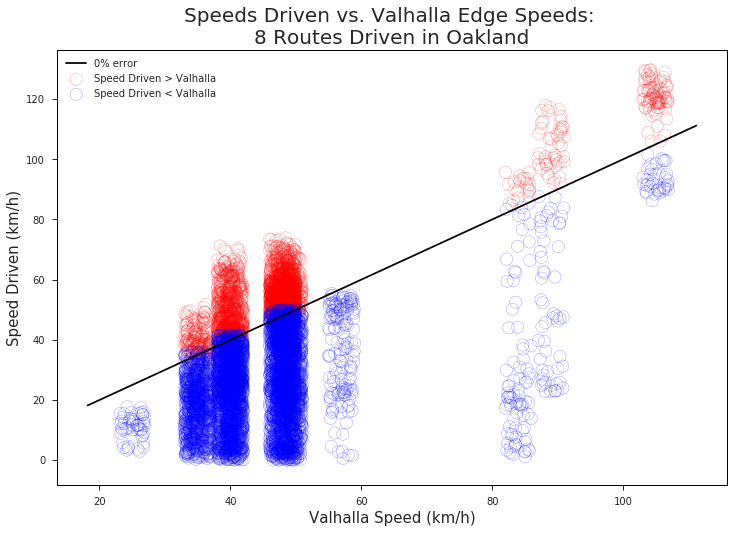

In [6]:
val.plotDrivenVsValhallaScatter(errors, 'Oakland', saveFig=False)

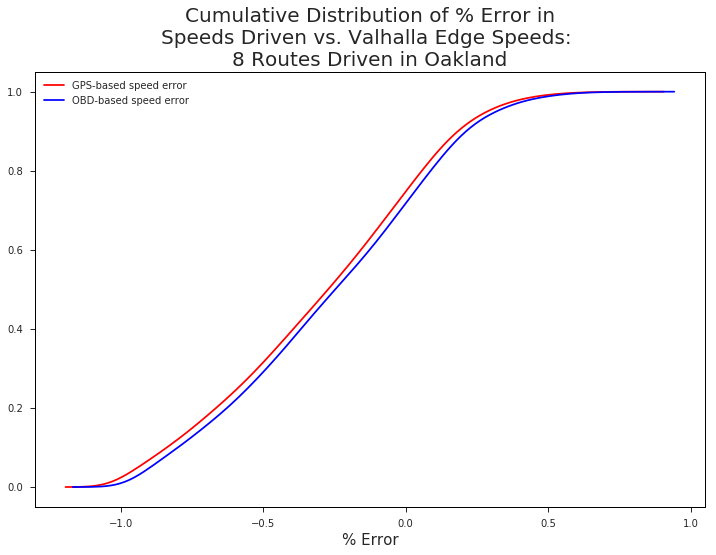

In [7]:
val.plotSpeedErrCDFs(errors, 'Oakland', saveFig=False)

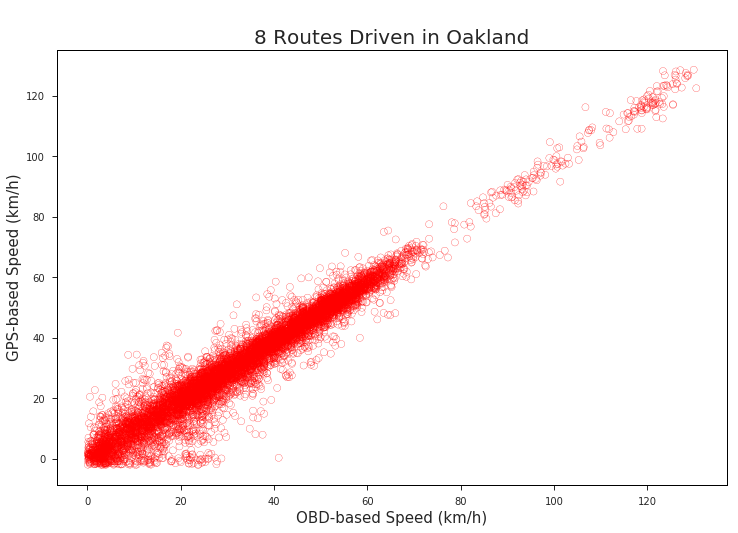

In [5]:
val.plotOBDVsGPSScatter(errors, 'Oakland', saveFig=False)